# 第 9  章  绘图和可视化
信息可视化（也叫绘图）是数据分析中最重要的工作之一。它可能是探索过程
的一部分，例如，帮助我们找出异常值、必要的数据转换、得出有关模型的
idea 等。另外，做一个可交互的数据可视化也许是工作的最终目标。Python 有
许多库进行静态或动态的数据可视化，但我这里重要关注于 matplotlib
（http://matplotlib.org/）和基于它的库。

matplotlib 是一个用于创建出版质量图表的桌面绘图包（主要是 2D 方面）。
该项目是由 John Hunter 于 2002 年启动的，其目的是为 Python 构建一个
MATLAB 式的绘图接口。matplotlib 和 IPython 社区进行合作，简化了从
IPython shell（包括现在的 Jupyter notebook）进行交互式绘图。
matplotlib 支持各种操作系统上许多不同的 GUI 后端，而且还能将图片导出为
各种常见的矢量（vector）和光栅（raster）图：PDF、SVG、JPG、PNG、BMP、
GIF 等。除了几张，本书中的大部分图都是用它生成的。
随着时间的发展，matplotlib 衍生出了多个数据可视化的工具集，它们使用
matplotlib 作为底层。其中之一是 seaborn
（http://seaborn.pydata.org/），本章后面会学习它。

学习本章代码案例的最简单方法是在 Jupyter notebook 进行交互式绘图。在
Jupyter notebook 中执行下面的语句：

%matplotlib notebook

In [29]:
%matplotlib notebook

## 9.1 matplotlib API 入门
matplotlib 的通常引入约定是：

In [30]:
import matplotlib.pyplot as plt

在 Jupyter 中运行`%matplotlib notebook`（或在 IPython 中运
行`%matplotlib`），就可以创建一个简单的图形。如果一切设置正确，会看到图
9-1：

In [31]:
import numpy as np

In [32]:
data = np.arange(10)

In [33]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


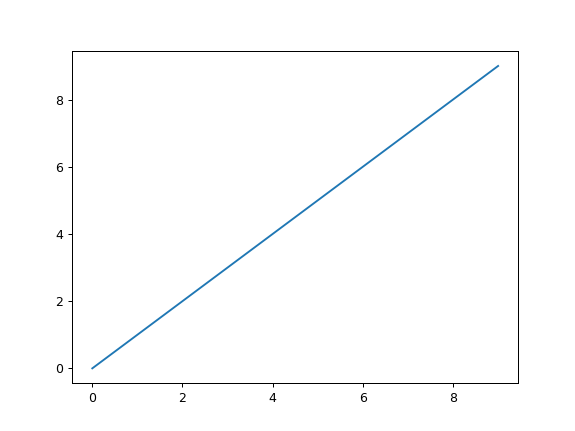

In [34]:
plt.plot(data)

虽然 seaborn 这样的库和 pandas 的内置绘图函数能够处理许多普通的绘图任
务，但如果需要自定义一些高级功能的话就必须学习 matplotlib API。
笔记：虽然本书没有详细地讨论 matplotlib 的各种功能，但足以将你引入门。
matplotlib 的示例库和文档是学习高级特性的最好资源。
## Figure 和 Subplot
matplotlib 的图像都位于 Figure 对象中。你可以用 plt.figure 创建一个新的
Figure：

<IPython.core.display.Javascript object>


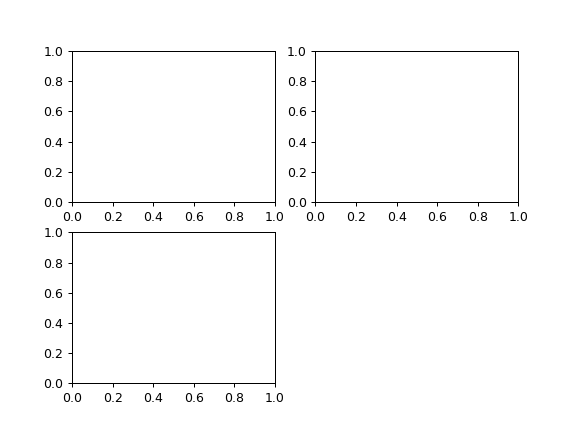

In [35]:
fig = plt.figure()

如果用的是 IPython，这时会弹出一个空窗口，但在 Jupyter 中，必须再输入
更多命令才能看到。plt.figure 有一些选项，特别是 figsize，它用于确保当
图片保存到磁盘时具有一定的大小和纵横比。
不能通过空 Figure 绘图。必须用 add_subplot 创建一个或多个 subplot 才行：

In [36]:
ax1 = fig.add_subplot(2, 2, 1)

这条代码的意思是：图像应该是 2×2 的（即最多 4 张图），且当前选中的是 4
个 subplot 中的第一个（编号从 1 开始）。如果再把后面两个 subplot 也创建
出来，最终得到的图像如图 9-2 所示：

In [37]:
ax2 = fig.add_subplot(2, 2, 2)

In [38]:
ax3 = fig.add_subplot(2, 2, 3)

提示：使用 Jupyter notebook 有一点不同，即每个小窗重新执行后，图形会被
重置。因此，对于复杂的图形，，你必须将所有的绘图命令存在一个小窗里。
这里，我们运行同一个小窗里的所有命令：

<IPython.core.display.Javascript object>


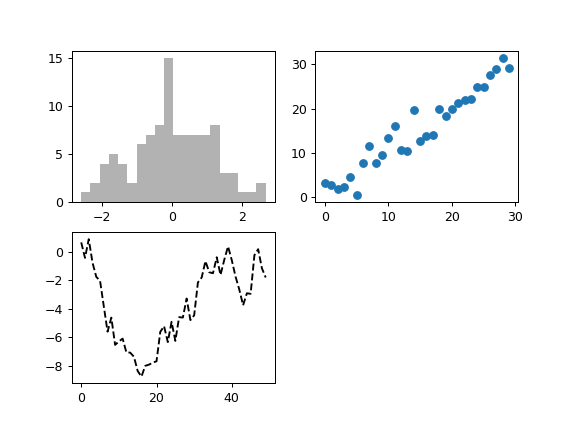

In [39]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

如果这时执行一条绘图命令（如 plt.plot([1.5, 3.5, -2, 1.6])），
matplotlib 就会在最后一个用过的 subplot（如果没有则创建一个）上进行绘
制，隐藏创建 figure 和 subplot 的过程。因此，如果我们执行下列命令，你就
会得到如图 9-3 所示的结果：

In [40]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

"k--"是一个线型选项，用于告诉 matplotlib 绘制黑色虚线图。上面那些由
fig.add_subplot 所返回的对象是 AxesSubplot 对象，直接调用它们的实例方
法就可以在其它空着的格子里面画图了，如图 9-4 所示：

In [41]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [42]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

你可以在 matplotlib 的文档中找到各种图表类型。
创建包含 subplot 网格的 figure 是一个非常常见的任务，matplotlib 有一个
更为方便的方法 plt.subplots，它可以创建一个新的 Figure，并返回一个含有
已创建的 subplot 对象的 NumPy 数组：

<IPython.core.display.Javascript object>


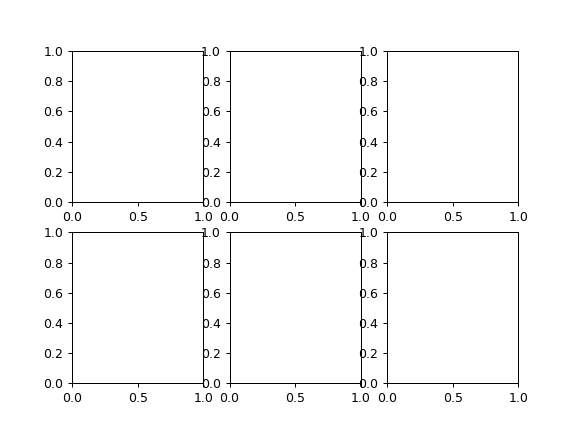

In [43]:
fig, axes = plt.subplots(2, 3)

In [44]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E83977F60>,
      dtype=object)

这是非常实用的，因为可以轻松地对 axes 数组进行索引，就好像是一个二维数
组一样，例如 axes[0,1]。你还可以通过 sharex 和 sharey 指定 subplot 应该
具有相同的 X 轴或 Y 轴。在比较相同范围的数据时，这也是非常实用的，否
则，matplotlib 会自动缩放各图表的界限。有关该方法的更多信息，请参见表
9-1。

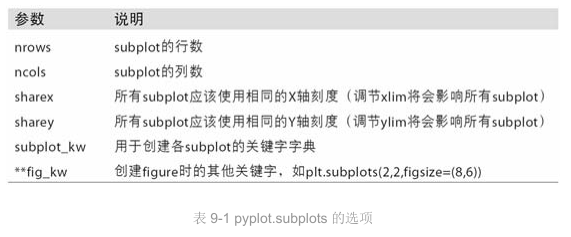

### 调整 subplot 周围的间距
默认情况下，matplotlib 会在 subplot 外围留下一定的边距，并在 subplot 之
间留下一定的间距。间距跟图像的高度和宽度有关，因此，如果你调整了图像
大小（不管是编程还是手工），间距也会自动调整。利用 Figure 的
subplots_adjust 方法可以轻而易举地修改间距，此外，它也是个顶级函数：

wspace 和 hspace 用于控制宽度和高度的百分比，可以用作 subplot 之间的间
距。下面是一个简单的例子，其中我将间距收缩到了 0（如图 9-5 所示）：

<IPython.core.display.Javascript object>


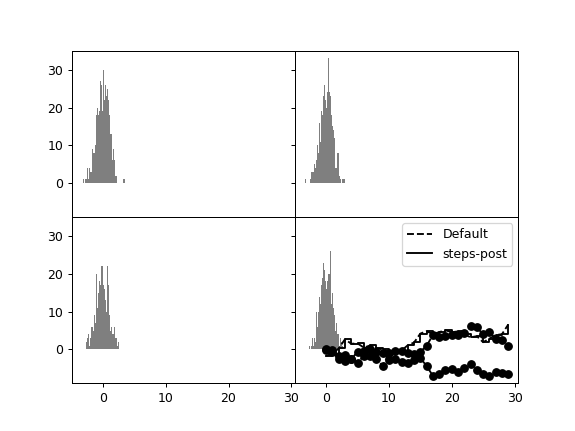

In [45]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
        
plt.subplots_adjust(wspace=0, hspace=0)

不难看出，其中的轴标签重叠了。matplotlib 不会检查标签是否重叠，所以对
于这种情况，你只能自己设定刻度位置和刻度标签。后面几节将会详细介绍该
内容。
### 颜色、标记和线型
matplotlib 的 plot 函数接受一组 X 和 Y 坐标，还可以接受一个表示颜色和线
型的字符串缩写。例如，要根据 x 和 y 绘制绿色虚线，你可以执行如下代码：

ax.plot(x, y, 'g--')

这种在一个字符串中指定颜色和线型的方式非常方便。在实际中，如果你是用
代码绘图，你可能不想通过处理字符串来获得想要的格式。通过下面这种更为
明确的方式也能得到同样的效果：

`ax.plot(x, y, linestyle='--', color='g')`

常用的颜色可以使用颜色缩写，你也可以指定颜色码（例如，'#CECECE'）。你
可以通过查看 plot 的文档字符串查看所有线型的合集（在 IPython 和 Jupyter
中使用 plot?）。
线图可以使用标记强调数据点。因为 matplotlib 可以创建连续线图，在点之间
进行插值，因此有时可能不太容易看出真实数据点的位置。标记也可以放到格
式字符串中，但标记类型和线型必须放在颜色后面（见图 9-6）：

In [46]:
from numpy.random import randn

In [47]:
plt.plot(randn(30).cumsum(), 'ko--')

还可以将其写成更为明确的形式：

In [48]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

在线型图中，非实际数据点默认是按线性方式插值的。可以通过 drawstyle 选
项修改（见图 9-7）：

In [49]:
data = np.random.randn(30).cumsum()

In [50]:
plt.plot(data, 'k--', label='Default')

In [51]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

# why

In [52]:
plt.legend(loc='best')

你可能注意到运行上面代码时有输出<matplotlib.lines.Line2D at ...>。
matplotlib 会返回引用了新添加的子组件的对象。大多数时候，你可以放心地
忽略这些输出。这里，因为我们传递了 label 参数到 plot，我们可以创建一个
plot 图例，指明每条使用 plt.legend 的线。
笔记：你必须调用 plt.legend（或使用 ax.legend，如果引用了轴的话）来创
建图例，无论你绘图时是否传递 label 标签选项。
### 刻度、标签和图例
对于大多数的图表装饰项，其主要实现方式有二：使用过程型的 pyplot 接口
（例如，matplotlib.pyplot）以及更为面向对象的原生 matplotlib API。

pyplot 接口的设计目的就是交互式使用，含有诸如 xlim、xticks 和
xticklabels 之类的方法。它们分别控制图表的范围、刻度位置、刻度标签
等。其使用方式有以下两种：
-  调用时不带参数，则返回当前的参数值（例如，plt.xlim()返回当前的 X 轴绘图范围）。
-  调用时带参数，则设置参数值（例如，plt.xlim([0,10])会将 X 轴的范围设置为 0 到 10）。

所有这些方法都是对当前或最近创建的 AxesSubplot 起作用的。它们各自对应
subplot 对象上的两个方法，以 xlim 为例，就是 ax.get_xlim 和
ax.set_xlim。我更喜欢使用 subplot 的实例方法（因为我喜欢明确的事情，而
且在处理多个 subplot 时这样也更清楚一些）。当然你完全可以选择自己觉得
方便的那个。
### 设置标题、轴标签、刻度以及刻度标签
为了说明自定义轴，我将创建一个简单的图像并绘制一段随机漫步（如图 9-8
所示）：

<IPython.core.display.Javascript object>


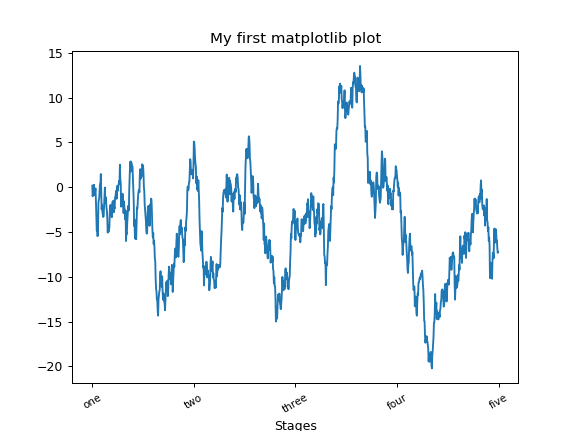

In [53]:
fig = plt.figure()

In [54]:
ax = fig.add_subplot(1, 1, 1)

In [55]:
ax.plot(np.random.randn(1000).cumsum())

要改变 x 轴刻度，最简单的办法是使用 set_xticks 和 set_xticklabels。前者
告诉 matplotlib 要将刻度放在数据范围中的哪些位置，默认情况下，这些位置
也就是刻度标签。但我们可以通过 set_xticklabels 将任何其他的值用作标
签：

In [56]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [57]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

rotation 选项设定 x 刻度标签倾斜 30 度。最后，再用 set_xlabel 为 X 轴设置
一个名称，并用 set_title 设置一个标题（见图 9-9 的结果）：

In [58]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

In [59]:
ax.set_xlabel('Stages')

Text(0.5, 11.172245067556123, 'Stages')

Y 轴的修改方式与此类似，只需将上述代码中的 x 替换为 y 即可。轴的类有集
合方法，可以批量设定绘图选项。前面的例子，也可以写为：

In [60]:
props = {
'title': 'My first matplotlib plot',
'xlabel': 'Stages'
}
ax.set(**props)

[Text(0.5, 11.172245067556123, 'Stages'),
 Text(0.5, 1.0, 'My first matplotlib plot')]

### 添加图例
图例（legend）是另一种用于标识图表元素的重要工具。添加图例的方式有多
种。最简单的是在添加 subplot 的时候传入 label 参数：

In [70]:
from numpy.random import randn

<IPython.core.display.Javascript object>


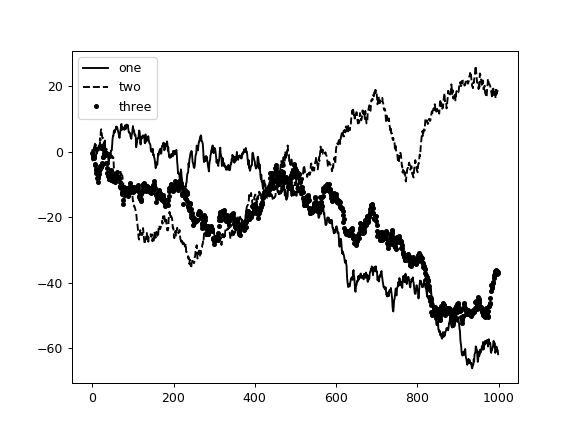

In [71]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

In [72]:
ax.plot(randn(1000).cumsum(), 'k', label='one')

In [73]:
ax.plot(randn(1000).cumsum(), 'k--', label='two')

In [74]:
ax.plot(randn(1000).cumsum(), 'k.', label='three')

在此之后，你可以调用 ax.legend()或 plt.legend()来自动创建图例（结果见
图 9-10）：

In [75]:
ax.legend(loc='best')

legend 方法有几个其它的 loc 位置参数选项。请查看文档字符串（使用
ax.legend?）。

loc 告诉 matplotlib 要将图例放在哪。如果你不是吹毛求疵的话，"best"是不
错的选择，因为它会选择最不碍事的位置。要从图例中去除一个或多个元素，
不传入 label 或传入 label=' nolegend '即可。（中文第一版这里把 best 错写
成了 beat）
### 注解以及在 Subplot 上绘图
除标准的绘图类型，你可能还希望绘制一些子集的注解，可能是文本、箭头或
其他图形等。注解和文字可以通过 text、arrow 和 annotate 函数进行添加。
text 可以将文本绘制在图表的指定坐标(x,y)，还可以加上一些自定义格式：

`ax.text(x, y, 'Hello world!',
        family='monospace', fontsize=10)`

注解中可以既含有文本也含有箭头。例如，我们根据最近的标准普尔 500 指数
价格（来自 Yahoo!Finance）绘制一张曲线图，并标出 2008 年到 2009 年金融
危机期间的一些重要日期。你可以在 Jupyter notebook 的一个小窗中试验这段
代码（图 9-11 是结果）：

<IPython.core.display.Javascript object>


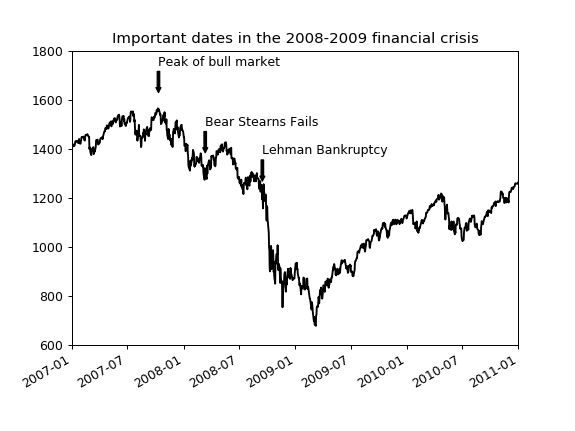

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [78]:
from datetime import datetime
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
                horizontalalignment='left', 
                verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

这张图中有几个重要的点要强调：ax.annotate 方法可以在指定的 x 和 y 坐标
轴绘制标签。我们使用 set_xlim 和 set_ylim 人工设定起始和结束边界，而不
使用 matplotlib 的默认方法。最后，用 ax.set_title 添加图标标题。

更多有关注解的示例，请访问 matplotlib 的在线示例库。

图形的绘制要麻烦一些。matplotlib 有一些表示常见图形的对象。这些对象被
称为块（patch）。其中有些（如 Rectangle 和 Circle），可以在
matplotlib.pyplot 中找到，但完整集合位于 matplotlib.patches。

要在图表中添加一个图形，你需要创建一个块对象 shp，然后通过
ax.add_patch(shp)将其添加到 subplot 中（如图 9-12 所示）：

<IPython.core.display.Javascript object>


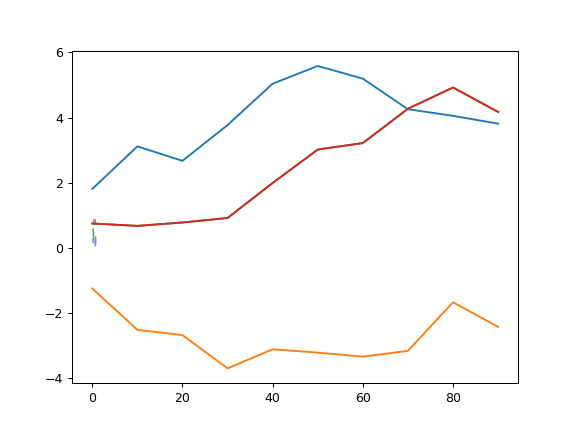

In [79]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, 
                     color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, 
                  color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

如果查看许多常见图表对象的具体实现代码，你就会发现它们其实就是由块
patch 组装而成的。
### 将图表保存到文件
利用 plt.savefig 可以将当前图表保存到文件。该方法相当于 Figure 对象的实
例方法 savefig。例如，要将图表保存为 SVG 文件，你只需输入：

In [80]:
plt.savefig('figpath.svg')

文件类型是通过文件扩展名推断出来的。因此，如果你使用的是.pdf，就会得
到一个 PDF 文件。我在发布图片时最常用到两个重要的选项是 dpi（控制“每
英寸点数”分辨率）和 bbox_inches（可以剪除当前图表周围的空白部分）。
要得到一张带有最小白边且分辨率为 400DPI 的 PNG 图片，你可以：

In [81]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

savefig 并非一定要写入磁盘，也可以写入任何文件型的对象，比如 BytesIO：

In [82]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

表 9-2 列出了 savefig 的其它选项。

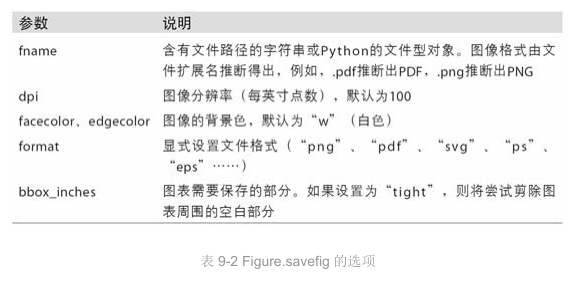

### matplotlib 配置
matplotlib 自带一些配色方案，以及为生成出版质量的图片而设定的默认配置
信息。幸运的是，几乎所有默认行为都能通过一组全局参数进行自定义，它们
可以管理图像大小、subplot 边距、配色方案、字体大小、网格类型等。一种
Python 编程方式配置系统的方法是使用 rc 方法。例如，要将全局的图像默认
大小设置为 10×10，你可以执行：

In [83]:
plt.rc('figure', figsize=(10, 10))

rc 的第一个参数是希望自定义的对象，如'figure'、'axes'、'xtick'、
'ytick'、'grid'、'legend'等。其后可以跟上一系列的关键字参数。一个简单
的办法是将这些选项写成一个字典：

In [85]:
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size' : 1.1}

plt.rc('font', **font_options)

要了解全部的自定义选项，请查阅 matplotlib 的配置文件 matplotlibrc（位
于 matplotlib/mpl-data 目录中）。如果对该文件进行了自定义，并将其放在
你自己的.matplotlibrc 目录中，则每次使用 matplotlib 时就会加载该文件。

下一节，我们会看到，seaborn 包有若干内置的绘图主题或类型，它们使用了
matplotlib 的内部配置。
## 9.2 使用 pandas 和 seaborn 绘图
matplotlib 实际上是一种比较低级的工具。要绘制一张图表，你组装一些基本
组件就行：数据展示（即图表类型：线型图、柱状图、盒形图、散布图、等值
线图等）、图例、标题、刻度标签以及其他注解型信息。

在 pandas 中，我们有多列数据，还有行和列标签。pandas 自身就有内置的方
法，用于简化从 DataFrame 和 Series 绘制图形。另一个库 seaborn
（https://seaborn.pydata.org/），由 Michael Waskom 创建的静态图形库。
Seaborn 简化了许多常见可视类型的创建。

提示：引入 seaborn 会修改 matplotlib 默认的颜色方案和绘图类型，以提高可
读性和美观度。即使你不使用 seaborn API，你可能也会引入 seaborn，作为提
高美观度和绘制常见 matplotlib 图形的简化方法。
### 线型图
Series 和 DataFrame 都有一个用于生成各类图表的 plot 方法。默认情况下，
它们所生成的是线型图（如图 9-13 所示）：

In [90]:
s = pd.Series(np.random.randn(10).cumsum(),index=np.arange(0, 100, 10))

# why

In [92]:
s.plot()

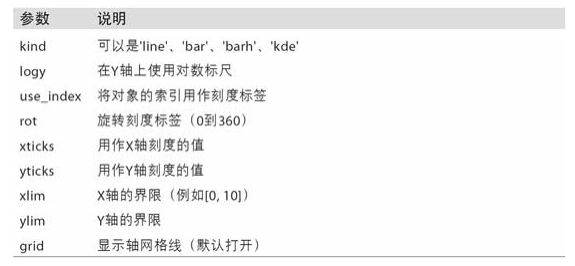

该 Series 对象的索引会被传给 matplotlib，并用以绘制 X 轴。可以通过
use_index=False 禁用该功能。X 轴的刻度和界限可以通过 xticks 和 xlim 选项
进行调节，Y 轴就用 yticks 和 ylim。plot 参数的完整列表请参见表 9-3。我只
会讲解其中几个，剩下的就留给读者自己去研究了。

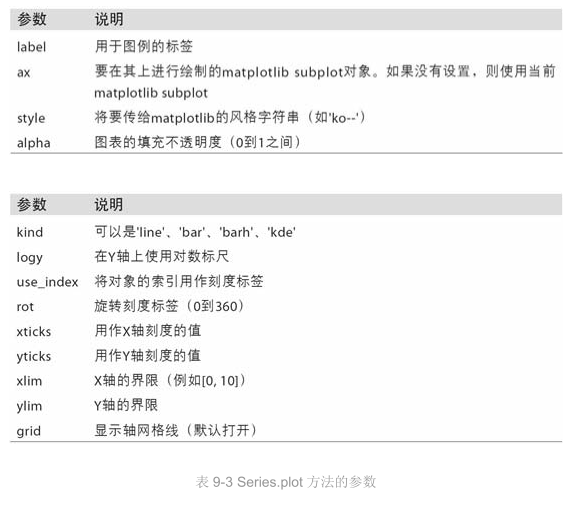

pandas 的大部分绘图方法都有一个可选的 ax 参数，它可以是一个 matplotlib
的 subplot 对象。这使你能够在网格布局中更为灵活地处理 subplot 的位置。
DataFrame 的 plot 方法会在一个 subplot 中为各列绘制一条线，并自动创建图
例（如图 9-14 所示）：

In [95]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))

<IPython.core.display.Javascript object>


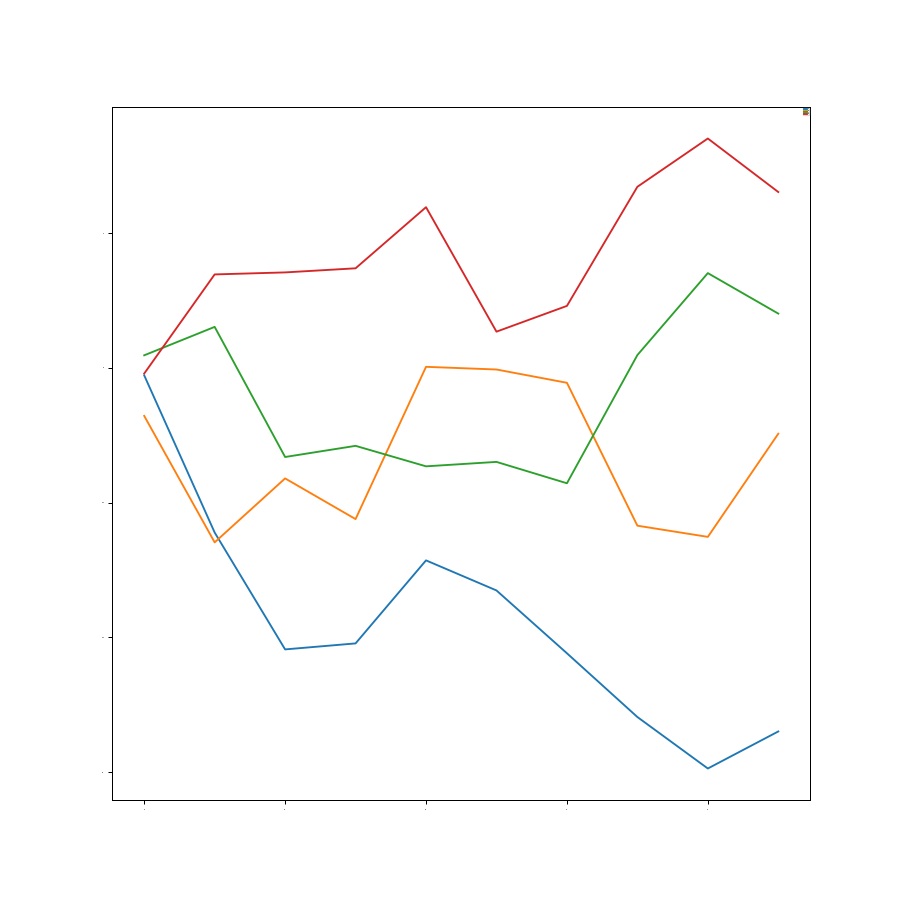

In [96]:
df.plot()

plot 属性包含一批不同绘图类型的方法。例如，df.plot()等价于
df.plot.line()。后面会学习这些方法。
笔记：plot 的其他关键字参数会被传给相应的 matplotlib 绘图函数，所以要
更深入地自定义图表，就必须学习更多有关 matplotlib API 的知识。
DataFrame 还有一些用于对列进行灵活处理的选项，例如，是要将所有列都绘
制到一个 subplot 中还是创建各自的 subplot。详细信息请参见表 9-4。

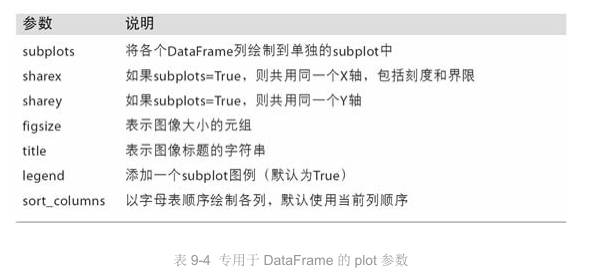

注意： 有关时间序列的绘图，请见第 11 章。
### 柱状图
plot.bar()和 plot.barh()分别绘制水平和垂直的柱状图。这时，Series 和
DataFrame 的索引将会被用作 X（bar）或 Y（barh）刻度（如图 9-15 所示）：

<IPython.core.display.Javascript object>


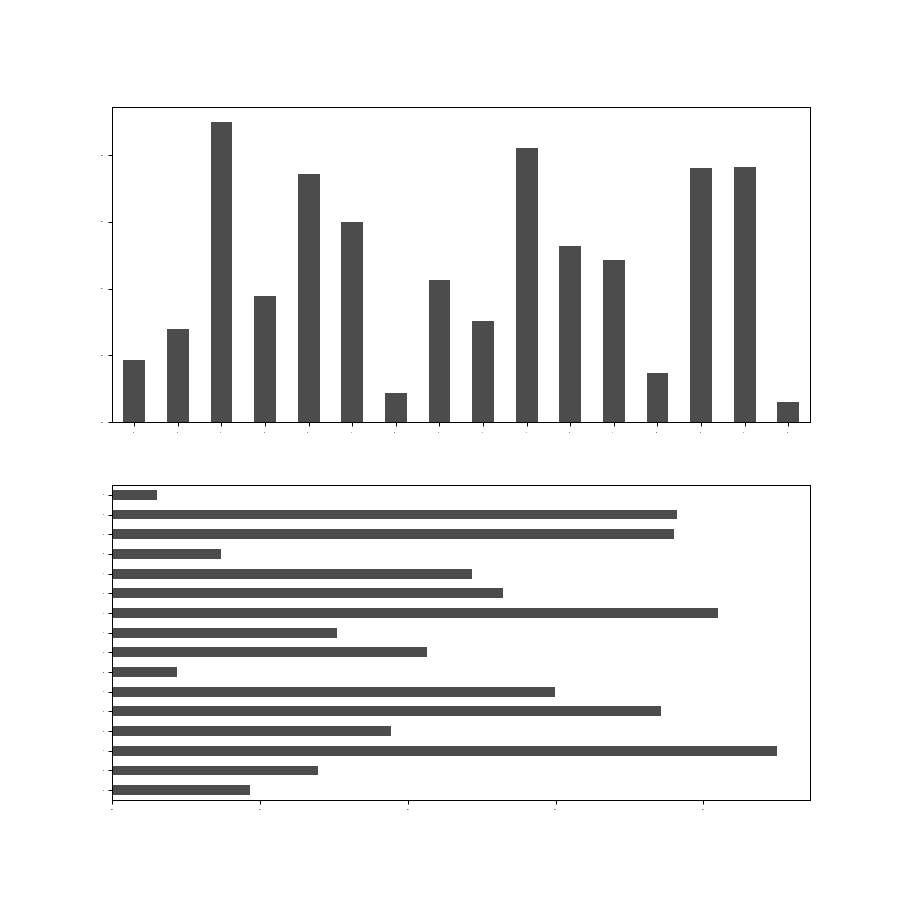

In [97]:
fig, axes = plt.subplots(2, 1)

In [98]:
data = pd.Series(np.random.rand(16),
                 index=list('abcdefghijklmnop'))

In [99]:
data.plot.bar(ax=axes[0], color='k', alpha=0.7)

In [100]:
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

color='k'和 alpha=0.7 设定了图形的颜色为黑色，并使用部分的填充透明度。
对于 DataFrame，柱状图会将每一行的值分为一组，并排显示，如图 9-16 所
示：

In [101]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [102]:
df

Genus,A,B,C,D
one,0.805946,0.552697,0.024347,0.631137
two,0.483855,0.435403,0.140085,0.021289
three,0.192970,0.408096,0.534281,0.352605
four,0.585693,0.930216,0.171001,0.121187
five,0.379373,0.865270,0.426679,0.287837
six,0.291558,0.106230,0.285108,0.477228


<IPython.core.display.Javascript object>


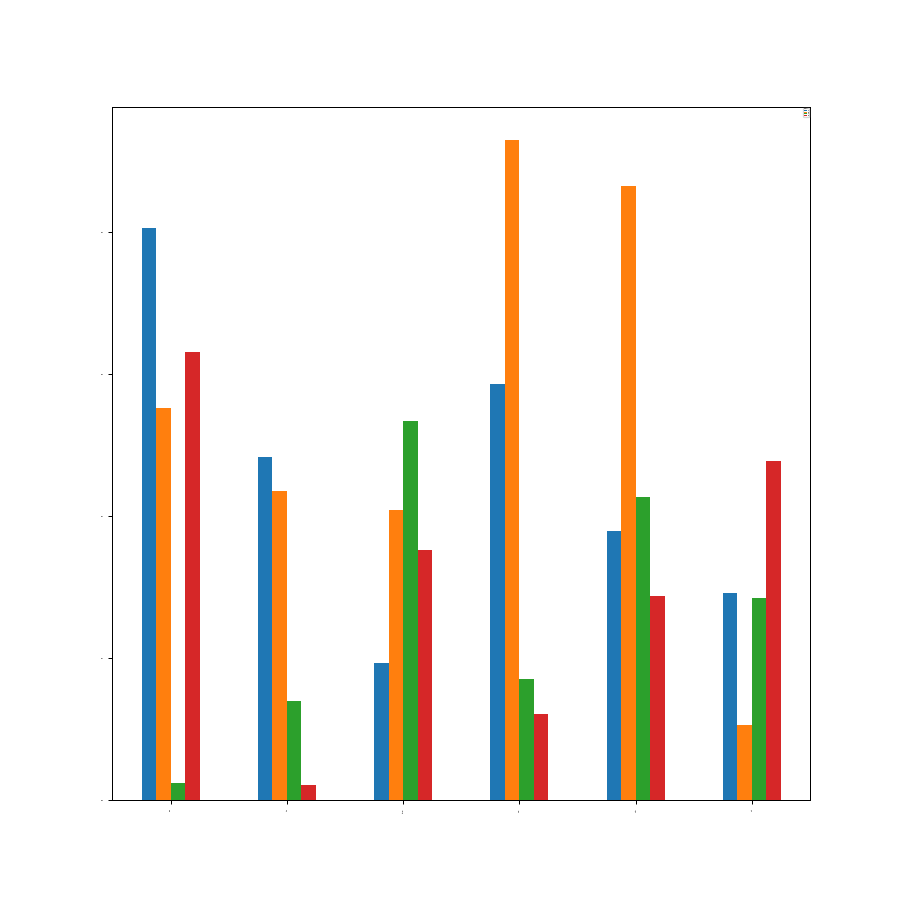

In [103]:
df.plot.bar()

注意，DataFrame 各列的名称"Genus"被用作了图例的标题。
设置 stacked=True 即可为 DataFrame 生成堆积柱状图，这样每行的值就会被堆
积在一起（如图 9-17 所示）：

<IPython.core.display.Javascript object>


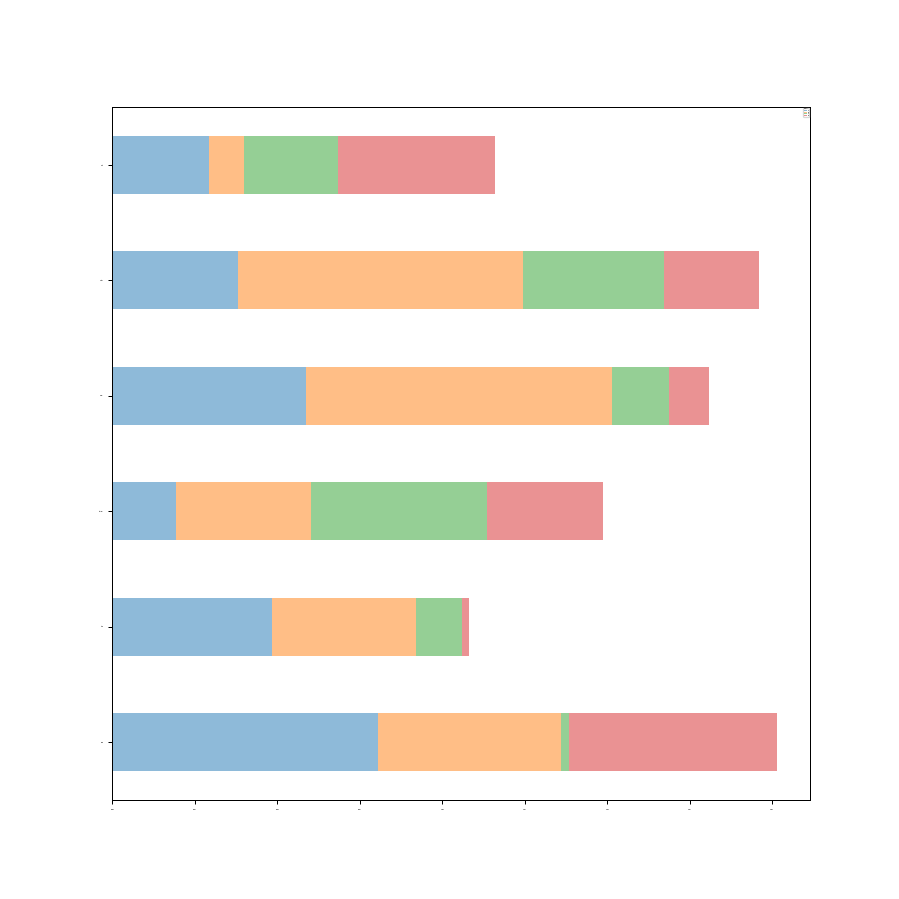

In [104]:
df.plot.barh(stacked=True, alpha=0.5)

笔记：柱状图有一个非常不错的用法：利用 value_counts 图形化显示 Series
中各值的出现频率，比如 s.value_counts().plot.bar()。
再以本书前面用过的那个有关小费的数据集为例，假设我们想要做一张堆积柱
状图以展示每天各种聚会规模的数据点的百分比。我用 read_csv 将数据加载进
来，然后根据日期和聚会规模创建一张交叉表：

In [105]:
tips = pd.read_csv('examples/tips.csv')

In [106]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [107]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [108]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

然后进行规格化，使得各行的和为 1，并生成图表（如图 9-18 所示）：

In [109]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

In [110]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


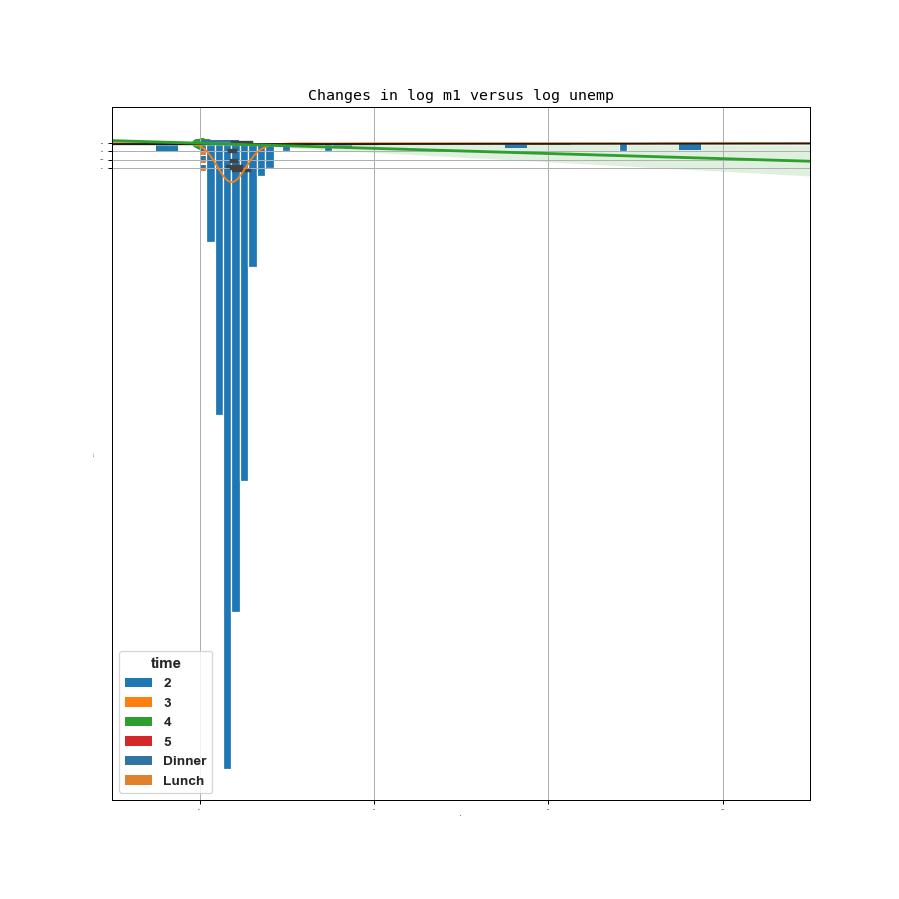

In [111]:
party_pcts.plot.bar()

于是，通过该数据集就可以看出，聚会规模在周末会变大。
对于在绘制一个图形之前，需要进行合计的数据，使用 seaborn 可以减少工作
量。用 seaborn 来看每天的小费比例（图 9-19 是结果）：

In [112]:
import seaborn as sns

In [113]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [114]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


In [115]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


seaborn 的绘制函数使用 data 参数，它可能是 pandas 的 DataFrame。其它的参
数是关于列的名字。因为一天的每个值有多次观察，柱状图的值是 tip_pct 的
平均值。绘制在柱状图上的黑线代表 95%置信区间（可以通过可选参数配
置）。

seaborn.barplot 有颜色选项，使我们能够通过一个额外的值设置（见图 9-
20）：

In [116]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

注意，seaborn 已经自动修改了图形的美观度：默认调色板，图形背景和网格
线的颜色。你可以用 seaborn.set 在不同的图形外观之间切换：

In [117]:
sns.set(style="whitegrid")

### 直方图和密度图
直方图（histogram）是一种可以对值频率进行离散化显示的柱状图。数据点被
拆分到离散的、间隔均匀的面元中，绘制的是各面元中数据点的数量。再以前
面那个小费数据为例，通过在 Series 使用 plot.hist 方法，我们可以生成一张
“小费占消费总额百分比”的直方图（如图 9-21 所示）：

In [118]:
tips['tip_pct'].plot.hist(bins=50)

与此相关的一种图表类型是密度图，它是通过计算“可能会产生观测数据的连
续概率分布的估计”而产生的。一般的过程是将该分布近似为一组核（即诸如
正态分布之类的较为简单的分布）。因此，密度图也被称作 KDE（Kernel
Density Estimate，核密度估计）图。使用 plot.kde 和标准混合正态分布估计
即可生成一张密度图（见图 9-22）：

In [119]:
tips['tip_pct'].plot.density()

seaborn 的 distplot 方法绘制直方图和密度图更加简单，还可以同时画出直方
图和连续密度估计图。作为例子，考虑一个双峰分布，由两个不同的标准正态
分布组成（见图 9-23）：

In [120]:
comp1 = np.random.normal(0, 1, size=200)

In [121]:
comp2 = np.random.normal(10, 2, size=200)

In [122]:
values = pd.Series(np.concatenate([comp1, comp2]))

In [123]:
sns.distplot(values, bins=100, color='k')

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


### 散布图或点图
点图或散布图是观察两个一维数据序列之间的关系的有效手段。在下面这个例
子中，我加载了来自 statsmodels 项目的 macrodata 数据集，选择了几个变
量，然后计算对数差：

In [124]:
macro = pd.read_csv('examples/macrodata.csv')

In [125]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [126]:
trans_data = np.log(data).diff().dropna()

In [127]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


然后可以使用 seaborn 的 regplot 方法，它可以做一个散布图，并加上一条线
性回归的线（见图 9-24）：

In [128]:
sns.regplot('m1', 'unemp', data=trans_data)

In [129]:
plt.title('Changes in log %s versus log %s' % ('m1',
'unemp'))

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

在探索式数据分析工作中，同时观察一组变量的散布图是很有意义的，这也被
称为散布图矩阵（scatter plot matrix）。纯手工创建这样的图表很费工夫，
所以 seaborn 提供了一个便捷的 pairplot 函数，它支持在对角线上放置每个变
量的直方图或密度估计（见图 9-25）：

<IPython.core.display.Javascript object>


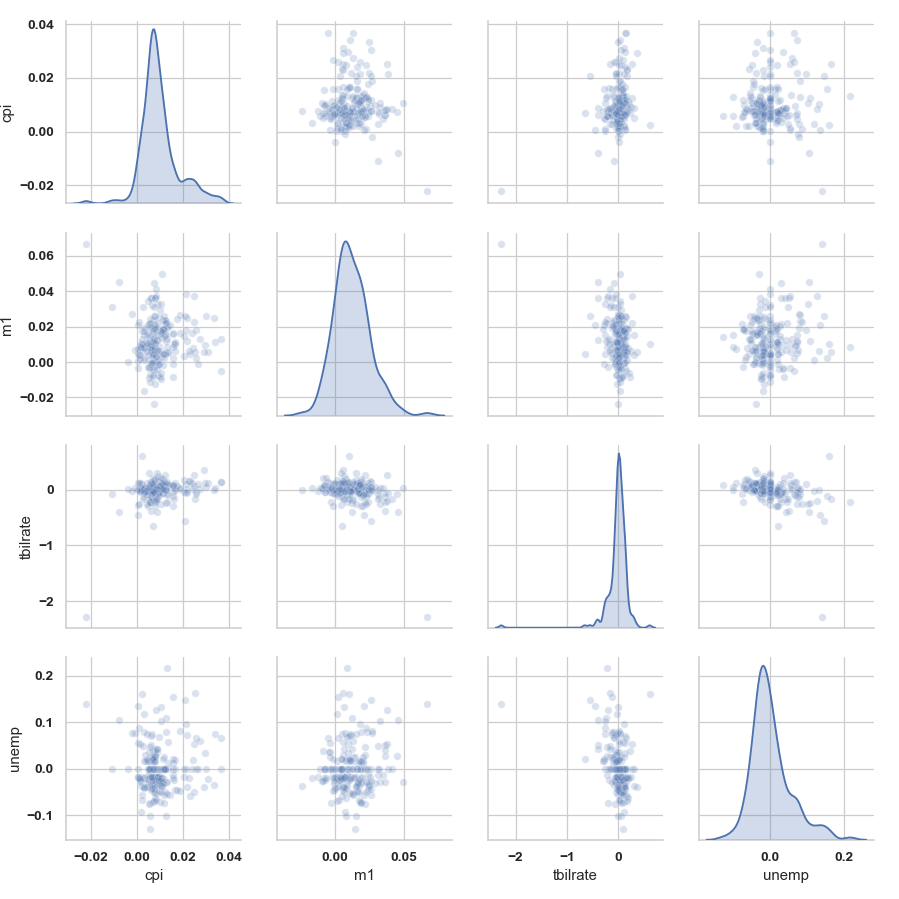

In [130]:
sns.pairplot(trans_data, diag_kind='kde',
             plot_kws={'alpha': 0.2})

你可能注意到了 plot_kws 参数。它可以让我们传递配置选项到非对角线元素上
的图形使用。对于更详细的配置选项，可以查阅 seaborn.pairplot 文档字符
串。
### 分面网格（facet grid）和类型数据
要是数据集有额外的分组维度呢？有多个分类变量的数据可视化的一种方法是
使用小面网格。seaborn 有一个有用的内置函数 factorplot，可以简化制作多
种分面图（见图 9-26）：

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


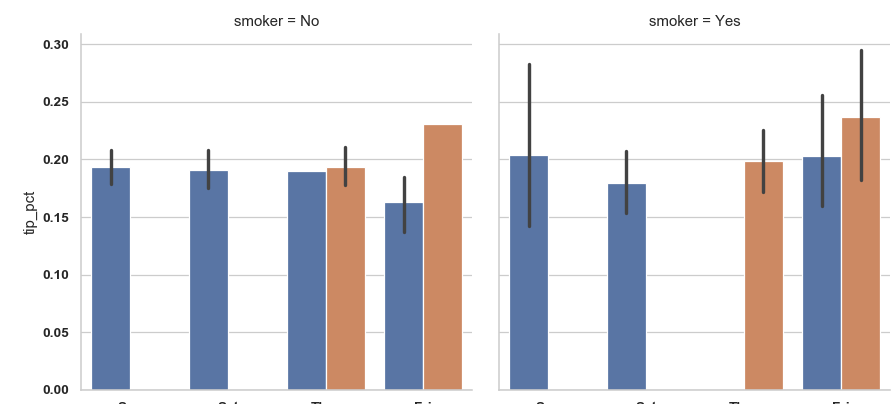

In [131]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

除了在分面中用不同的颜色按时间分组，我们还可以通过给每个时间值添加一
行来扩展分面网格：

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


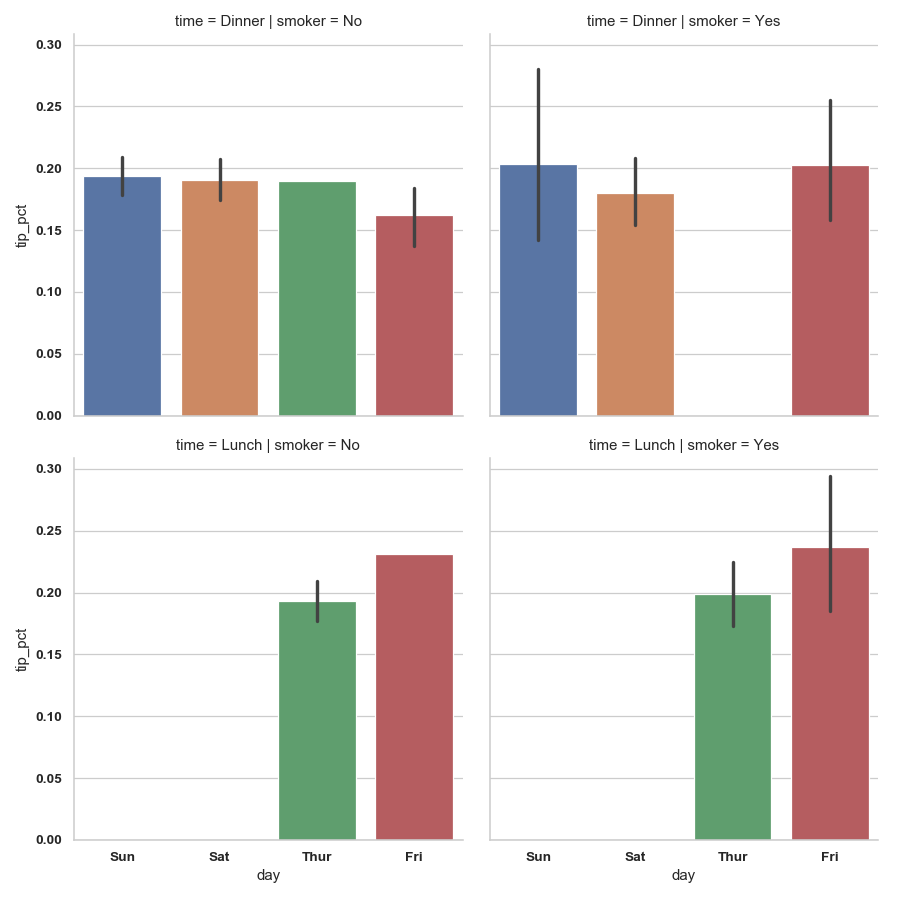

In [132]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

factorplot 支持其它的绘图类型，你可能会用到。例如，盒图（它可以显示中
位数，四分位数，和异常值）就是一个有用的可视化类型（见图 9-28）：

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


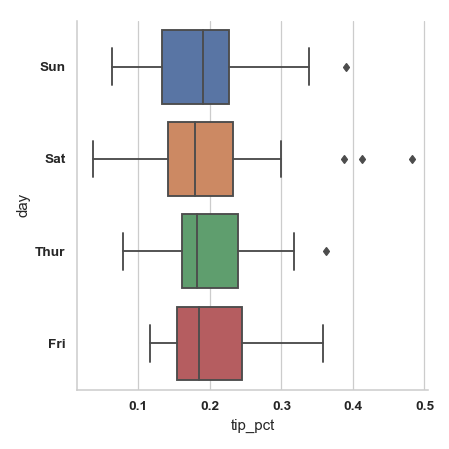

In [133]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

使用更通用的 seaborn.FacetGrid 类，你可以创建自己的分面网格。请查阅
seaborn 的文档（https://seaborn.pydata.org/）。
## 9.3 其它的 Python 可视化工具
与其它开源库类似，Python 创建图形的方式非常多（根本罗列不完）。自从
2010 年，许多开发工作都集中在创建交互式图形以便在 Web 上发布。利用工具
如 Boken（https://bokeh.pydata.org/en/latest/）和 Plotly
（https://github.com/plotly/plotly.py），现在可以创建动态交互图形，用
于网页浏览器。

对于创建用于打印或网页的静态图形，我建议默认使用 matplotlib 和附加的
库，比如 pandas 和 seaborn。对于其它数据可视化要求，学习其它的可用工具
可能是有用的。我鼓励你探索绘图的生态系统，因为它将持续发展。
## 9.4 总结
本章的目的是熟悉一些基本的数据可视化操作，使用 pandas，matplotlib，和
seaborn。如果视觉显示数据分析的结果对你的工作很重要，我鼓励你寻求更多
的资源来了解更高效的数据可视化。这是一个活跃的研究领域，你可以通过在
线和纸质的形式学习许多优秀的资源。

下一章，我们将重点放在 pandas 的数据聚合和分组操作上。